# Lab 1: Settling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
from matplotlib.patches import Polygon

In [2]:
#import data for maximum possible velocity and mass fraction remaining
massfrac=np.genfromtxt("mass_frac_type1.txt", delimiter='\t')
velocity=np.genfromtxt('max_vel_type1.txt', delimiter='\t')
massfrac=np.round(massfrac,4)
velocity=np.round(velocity,4)

## Type I Settling

In [3]:
#define overflow velocity 
flowrate=10*1e6/1000 #m3 per day
flowrate=flowrate/24/60 #m3 per min
area=60 #m2
overflow_vel=flowrate/area*100 #cm/min
mass_insert=np.zeros((10,7))
vel_insert=np.zeros((10,7))
overflow_vel

11.574074074074074

In [4]:
#target efficiency
rawfeed=829.2592593 #mg/l
targeteffluent=100 #mg/l
target_eff=(rawfeed-targeteffluent)/rawfeed
target_eff*100

87.94104511001629

In [5]:
# insert overflow velocity in max velocity array
# interpolate the corrresponding mass fraction remaining at overflow velocity
for i in range(10):
    if max(velocity[i,:])<overflow_vel:
        vel_insert[i,:]=np.hstack((overflow_vel,velocity[i,:]))
        ind=0
        x2=vel_insert[i,2]
        x1=vel_insert[i,1]
        y2=massfrac[i,1]
        y1=massfrac[i,0]
    else:
        ind=[ n for n,i in enumerate(velocity[i,:]) if i<overflow_vel ][0]
        vel_insert[i,:]=np.insert(velocity[i,:],ind, overflow_vel)
        x2=vel_insert[i,ind+1]
        x1=vel_insert[i,ind-1]
        y2=massfrac[i,ind]
        y1=massfrac[i,ind-1]
    mass_insert_val=y1+(y2-y1)/(x2-x1)*(vel_insert[i,ind]-x1)
    mass_insert[i,:]=np.insert(massfrac[i,:],ind,np.round(mass_insert_val,4))
    

In [6]:
#calculate removal efficiency based on trapezoid rule for integration
removal_eff=np.zeros(10)
for i in range(10):
    ind=np.argwhere(vel_insert[i,:]==overflow_vel)
    ind=np.asscalar(ind)
    area_under=-np.trapz(y=vel_insert[i,ind:], x=mass_insert[i,ind:])
    print(area_under)
    removal_eff[i]=area_under/overflow_vel+(1-mass_insert[i,ind])
removal_eff=np.round(removal_eff,4)*100
np.savetxt('Type I Removal Eff.txt',removal_eff, fmt='%.2f',delimiter='\t')
removal_eff

3.33847343241
3.28865229111
2.97134245926
2.25525820833
2.78701216667
2.94638309778
4.17448120148
2.95691639148
3.98689355222
2.90888293333


array([ 40.63,  61.37,  73.36,  77.02,  78.36,  48.44,  65.61,  72.97,
        69.53,  79.36])

## Type II Settling

In [7]:
#import Depth data
depth=np.genfromtxt("depth.txt", delimiter='\t')
removal_t2=np.genfromtxt('removal_pc_type2.txt', delimiter='\t')
time=np.array([0,3,6,12,35,50])
threshold_time=150/overflow_vel
threshold_time

12.959999999999999

In [8]:
time_mat=np.zeros((10,time.size))
for i in range(10):
    time_mat[i,:]=time

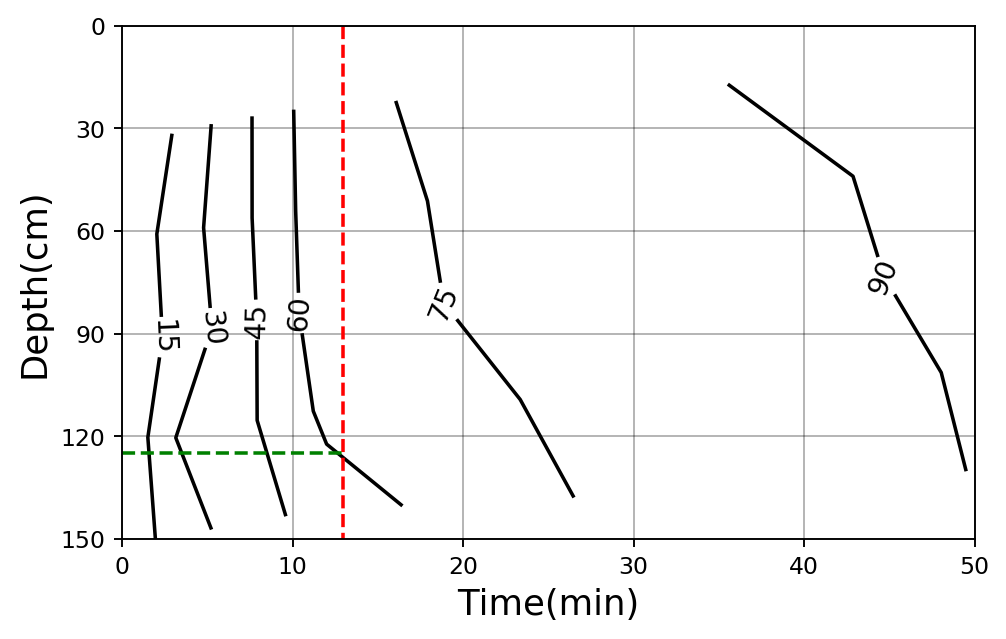

In [51]:
plt.figure(figsize=(4*1.618, 4), dpi=170)
colors=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
CS = plt.contour(time_mat[:5,:], depth[:5,:], removal_t2[:5,:],colors='k')
plt.grid(b=True, which='major', color='k', linestyle='-',alpha=0.3)
plt.clabel(CS, inline=1, fontsize=12,fmt='%.2d',linewidth='1.5')
plt.vlines(threshold_time,0,150,color='r',linestyle='--')
plt.hlines(125,0,threshold_time,color='g',linestyle='--')
plt.xlim([0,50])
plt.ylim([0,150])
plt.yticks([0,30,60,90,120,150])
plt.gca().invert_yaxis()
plt.xlabel('Time(min)',fontsize=15)
plt.ylabel('Depth(cm)',fontsize=15)
#plt.title('Type II Settling Curve for Column A',fontsize=18);
plt.savefig('T2_columnA.png',bbox_inches="tight")

In [202]:
# minimum removal percentage
min_removal=50
# next interval
interval=10
avg_depth=(150+125)/2
int1_removal=interval*avg_depth/150
#next interval
interval=75-60
avg_depth=(125-0)/2
int2_removal=interval*avg_depth/150
# total removal effficiency
removal_type_2a=min_removal+int1_removal+int2_removal
print(removal_type_2a)

65.41666666666666


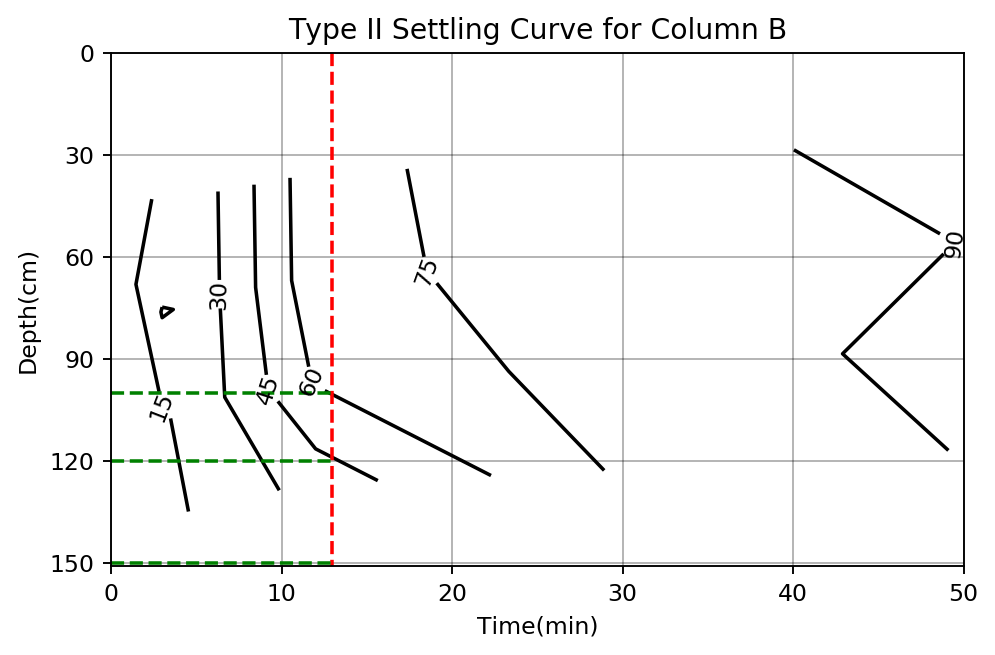

In [50]:
plt.figure(figsize=(4*1.618, 4), dpi=170)
CS = plt.contour(time_mat[5:9,:], depth[5:9,:], removal_t2[5:9,:],colors='k')
plt.grid(b=True, which='major', color='k', linestyle='-',alpha=0.3)
plt.clabel(CS, inline=1, fontsize=10,fmt='%.2d',linewidth='1.5')
plt.vlines(threshold_time,0,180,color='r',linestyle='--')
plt.hlines(150,0,threshold_time,color='g',linestyle='--')
plt.hlines(120,0,threshold_time,color='g',linestyle='--')
plt.hlines(100,0,threshold_time,color='g',linestyle='--')
plt.xlim([0,50])
plt.ylim([0,151])
plt.yticks([0,30,60,90,120,150])
plt.gca().invert_yaxis()
plt.xlabel('Time(min)')
plt.ylabel('Depth(cm)')
plt.title('Type II Settling Curve for Column B');

In [24]:
# minimum removal percentage
min_removal=30
# next interval
interval=45-30
avg_depth=(150+120)/2
int1_removal=interval*avg_depth/150
#next interval
interval=60-45
avg_depth=(120-100)/2
int2_removal=interval*avg_depth/150
#next interval
interval=75-60
avg_depth=(100-0)/2
int3_removal=interval*avg_depth/150
# total removal effficiency
removal_type_2b=min_removal+int1_removal+int2_removal+int3_removal
print(removal_type_2b)

49.5


In [25]:
# searching for the optimum area to reach target efficiency
# 75% at 25 min and 90% at 50 min
# Target is 88%
for i in range(24,50):
    min_removal=75+(i-25)*(90-75)/(50-25)
    interval=50-i
    avg_depth=150/2
    int_removal=interval*avg_depth/150
    removal_recc=min_removal+int_removal
    if removal_recc >= target_eff*100:
        recc_time=i
        print(i)
        print(removal_recc)
        break

30
88.0


In [37]:
for i in range(34,50):
    min_removal=75+(i-34)*(90-75)/(50-34)
    interval=50-i
    avg_depth=150/2
    int_removal=interval*avg_depth/150
    removal_recc=min_removal+int_removal
    if removal_recc >= target_eff*100:
        recc_time=i
        print(i)
        print(removal_recc)
        break

46
88.25


In [38]:
# surface area corresponding to reccommended time
recc_overflow=150/recc_time #cm/min
recc_area=flowrate/recc_overflow*100
recc_area

212.962962962963

In [39]:
recc_time=40
recc_overflow=150/recc_time #cm/min
recc_area=flowrate/recc_overflow*100
recc_area

185.1851851851852

## Plotting

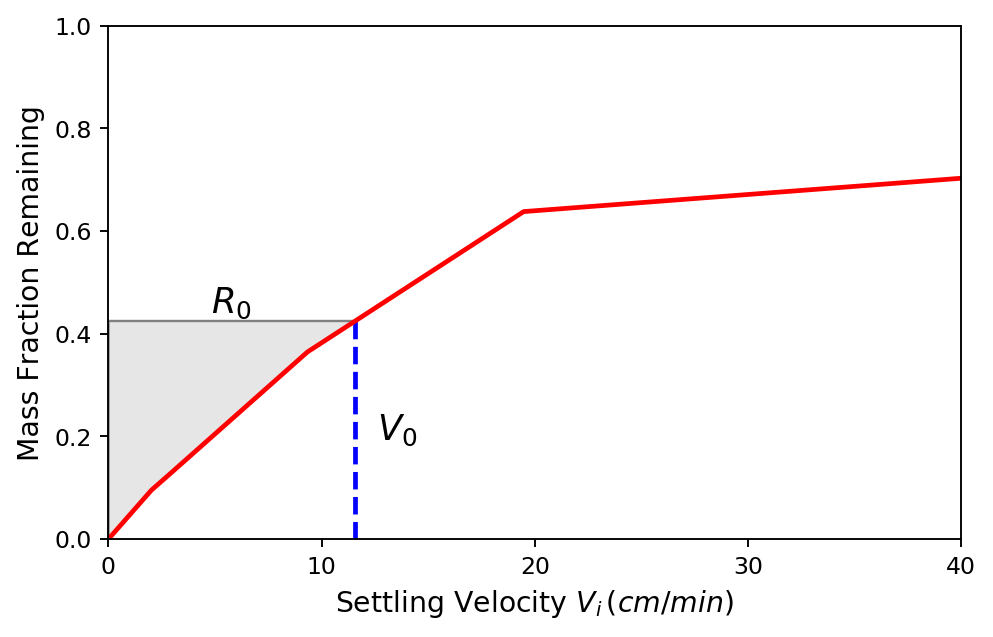

In [49]:
fig, ax = plt.subplots(figsize=(4*1.618, 4), dpi=170)
plt.plot(vel_insert[3,:], mass_insert[3,:], 'r', linewidth=2)
plt.ylim(ymin=0)
verts = [(0,mass_insert[3,2])] + list(zip(vel_insert[3,2:],mass_insert[3,2:])) + [(0,0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)
plt.vlines(overflow_vel,0,mass_insert[3,2],'b','--',lw=2)

plt.xlim([0,40])
plt.ylim([0,1])
plt.xticks([0,10,20,30,40])
plt.yticks([0,0.2,0.4,0.6,0.8,1])
plt.text(overflow_vel+1, mass_insert[3,2]/2, r"$V_0$",
         horizontalalignment='left', verticalalignment='center',fontsize=15)
plt.text(overflow_vel/2, mass_insert[3,2], r"$R_0$",
         horizontalalignment='center', verticalalignment='bottom',fontsize=15)
plt.xlabel('Settling Velocity $V_i \, (cm/min)$',fontsize=12)
plt.ylabel('Mass Fraction Remaining',fontsize=12)
plt.savefig('area_calc.png')

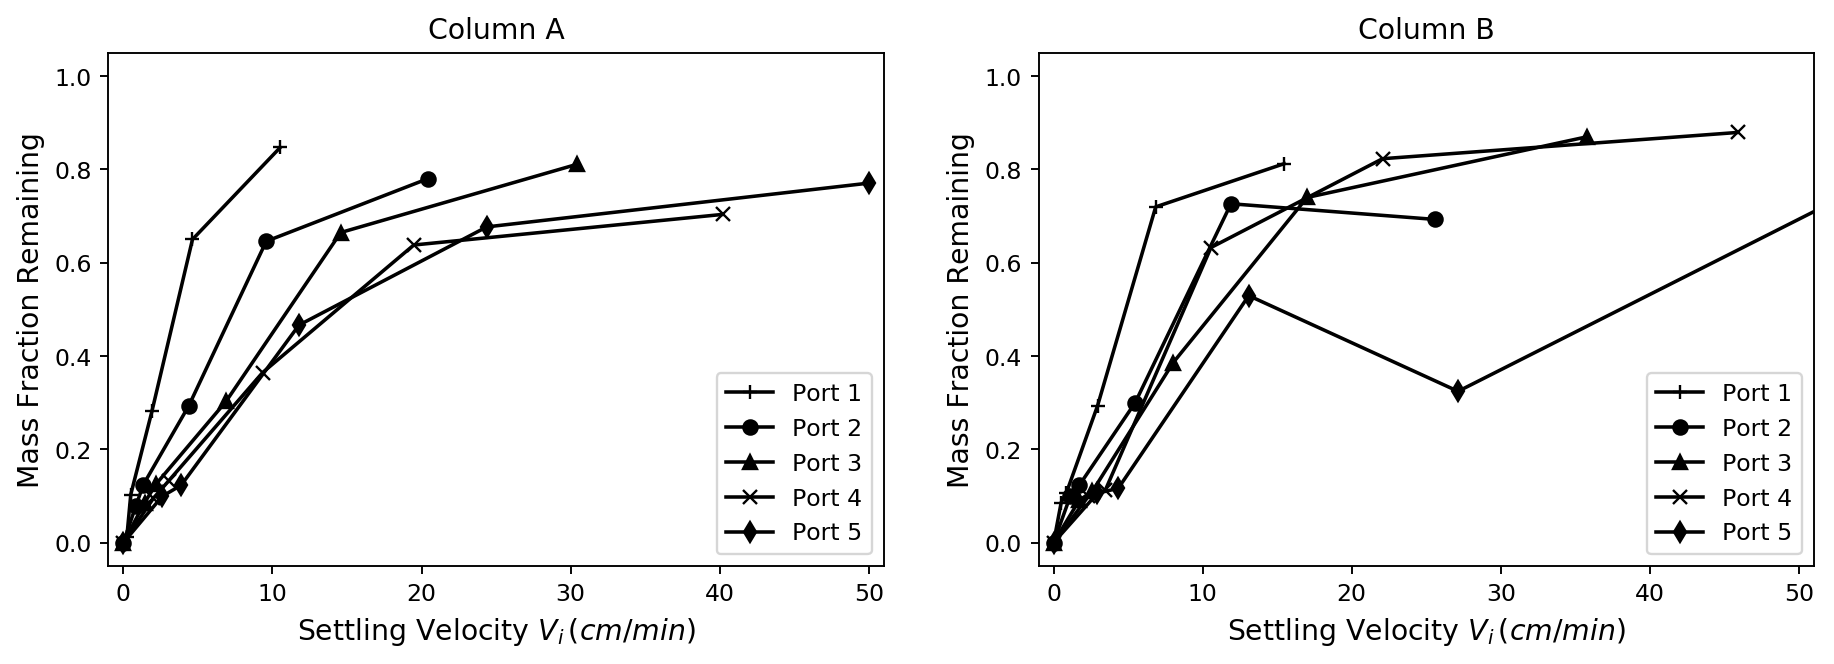

In [43]:
#colors=['#17becf','#bcbd22','#7f7f7f','#e377c2','#8c564b',
 #      '#9467bd','#d62728','#2ca02c','#ff7f0e','#1f77b4']
markers=['+','o','^','x','d']
labels=['Port 1','Port 2','Port 3','Port 4','Port 5']
fig = plt.figure(figsize=(8*1.618, 4), dpi=170)

ax1 = fig.add_subplot(121)
for i in range(5):
    ax1.plot(velocity[i,:],massfrac[i,:],label=labels[i],color='k',marker=markers[i])
ax1.legend(loc='lower right')
ax1.set_xlabel('Settling Velocity $V_i \, (cm/min)$',fontsize=12)
ax1.set_ylabel('Mass Fraction Remaining',fontsize=12)
ax1.set_xlim([-1,51])
ax1.set_ylim([-0.05,1.05])
ax1.set_title('Column A')

ax2 = fig.add_subplot(122)

for i in range(5):
    ax2.plot(velocity[i+5,:],massfrac[i+5,:],label=labels[i],color='k',marker=markers[i])
ax2.legend(loc='lower right')
ax2.set_xlabel('Settling Velocity $V_i \, (cm/min)$',fontsize=12)
ax2.set_ylabel('Mass Fraction Remaining',fontsize=12)
ax2.set_xlim([-1,51])
ax2.set_ylim([-0.05,1.05])
ax2.set_title('Column B')

plt.savefig('Type1all.png',bbox_inches="tight")

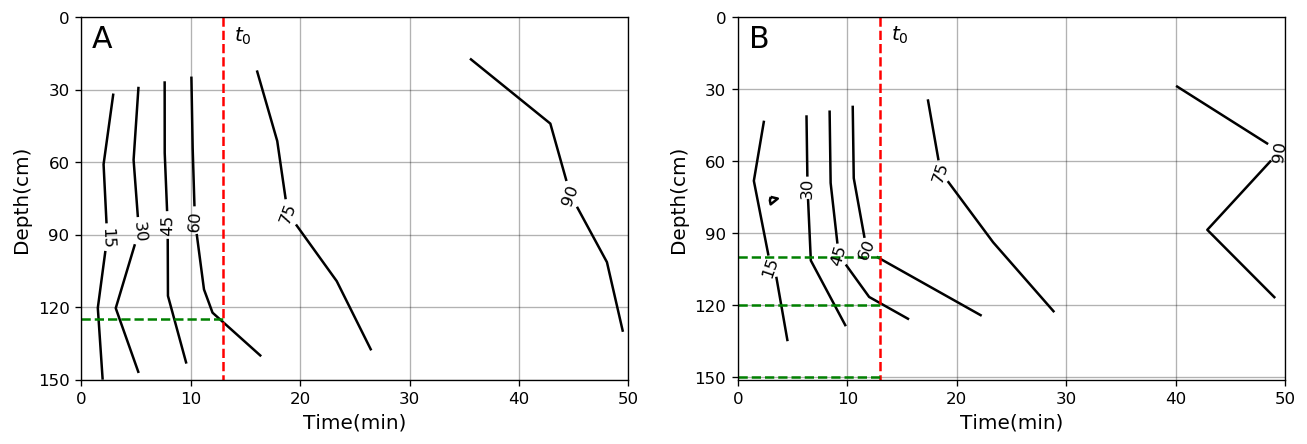

In [45]:
fig = plt.figure(figsize=(8*1.618, 4), dpi=120)

ax1 = fig.add_subplot(121)
CS = ax1.contour(time_mat[:5,:], depth[:5,:], removal_t2[:5,:],colors='k')
ax1.grid(b=True, which='major', color='k', linestyle='-',alpha=0.3)
ax1.clabel(CS, inline=1, fontsize=10,fmt='%.2d',linewidth='1.5')
ax1.vlines(threshold_time,0,150,color='r',linestyle='--')
ax1.hlines(125,0,threshold_time,color='g',linestyle='--')
ax1.set_xlim([0,50])
ax1.set_ylim([0,150])
ax1.set_yticks([0,30,60,90,120,150])
fig.gca().invert_yaxis()
ax1.set_xlabel('Time(min)',fontsize=12)
ax1.set_ylabel('Depth(cm)',fontsize=12)
ax1.text(1,3,'A',ha='left',va='top',fontsize=18)
ax1.text(threshold_time+1,3,'$t_0$',ha='left',va='top',fontsize=12)
ax2 = fig.add_subplot(122)
CS = ax2.contour(time_mat[5:9,:], depth[5:9,:], removal_t2[5:9,:],colors='k')
ax2.grid(b=True, which='major', color='k', linestyle='-',alpha=0.3)
ax2.clabel(CS, inline=1, fontsize=10,fmt='%.2d',linewidth='1.5')
ax2.vlines(threshold_time,0,180,color='r',linestyle='--')
ax2.hlines(150,0,threshold_time,color='g',linestyle='--')
ax2.hlines(120,0,threshold_time,color='g',linestyle='--')
ax2.hlines(100,0,threshold_time,color='g',linestyle='--')
ax2.set_xlim([0,50])
ax2.set_ylim([0,151])
ax2.set_yticks([0,30,60,90,120,150])
fig.gca().invert_yaxis()
ax2.set_xlabel('Time(min)',fontsize=12)
ax2.set_ylabel('Depth(cm)',fontsize=12)
ax2.text(1,3,'B',ha='left',va='top',fontsize=18)
ax2.text(threshold_time+1,3,'$t_0$',ha='left',va='top',fontsize=12)

plt.savefig('Type2all.png',bbox_inches="tight")

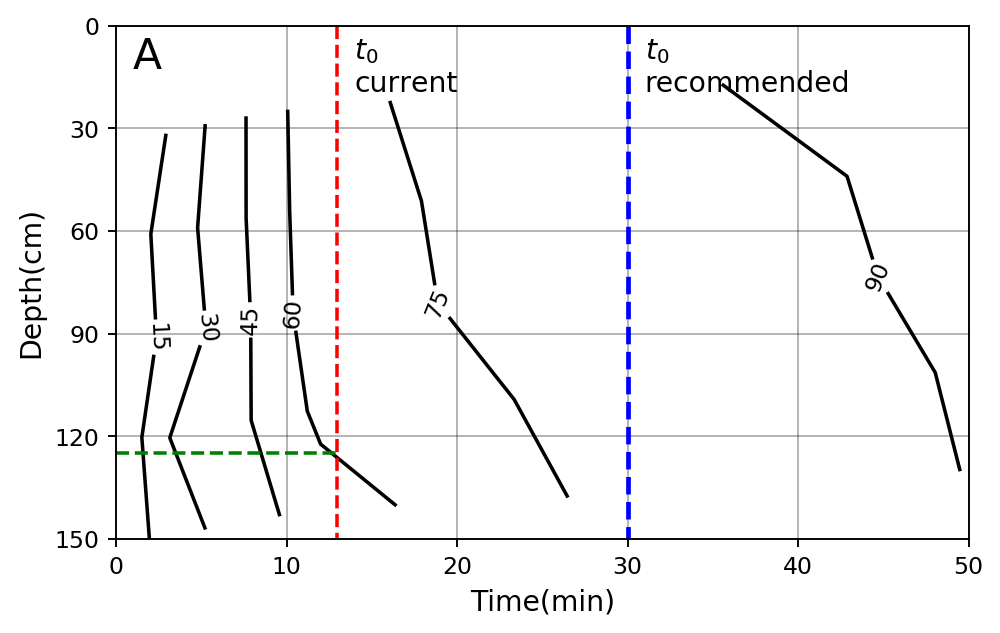

In [47]:
fig = plt.figure(figsize=(4*1.618, 4), dpi=170)

ax1 = fig.add_subplot(111)
CS = ax1.contour(time_mat[:5,:], depth[:5,:], removal_t2[:5,:],colors='k')
ax1.grid(b=True, which='major', color='k', linestyle='-',alpha=0.3)
ax1.clabel(CS, inline=1, fontsize=10,fmt='%.2d',linewidth='1.5')
ax1.vlines(threshold_time,0,150,color='r',linestyle='--')
ax1.vlines(30,0,150,color='b',linestyle='--',lw=2)
ax1.hlines(125,0,threshold_time,color='g',linestyle='--')
ax1.set_xlim([0,50])
ax1.set_ylim([0,150])
ax1.set_yticks([0,30,60,90,120,150])
fig.gca().invert_yaxis()
ax1.set_xlabel('Time(min)',fontsize=12)
ax1.set_ylabel('Depth(cm)',fontsize=12)
ax1.text(1,3,'A',ha='left',va='top',fontsize=18)
ax1.text(threshold_time+1,3,'$t_0$ \ncurrent',ha='left',va='top',fontsize=12)
ax1.text(30+1,3,'$t_0$ \nrecommended',ha='left',va='top',fontsize=12)

plt.savefig('Optim_search.png',bbox_inches="tight")

In [16]:
colors=['#17becf','#bcbd22','#7f7f7f','#e377c2','#8c564b',
       '#9467bd','#d62728','#2ca02c','#ff7f0e','#1f77b4']
colors

['#17becf',
 '#bcbd22',
 '#7f7f7f',
 '#e377c2',
 '#8c564b',
 '#9467bd',
 '#d62728',
 '#2ca02c',
 '#ff7f0e',
 '#1f77b4']